<a href="https://colab.research.google.com/github/farisassallami/Food-Sales-Predictions/blob/main/Core_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food-Sales-Predictions
- *Faris Assallami*

# Project 1 - Part 1

## Loading Data

In [14]:

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/sales_predictions.csv')
df.info()
df.head()

print(df.isna().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523

## Data Cleaning

In [15]:
# Removing columns that contain irrelevant data
df = df.drop(columns=['Item_Identifier','Outlet_Establishment_Year'])

print("After removing 2 irrelevant columns, there are now 8523 rows and 10 columns left")
print()
df.shape
df.head()


After removing 2 irrelevant columns, there are now 8523 rows and 10 columns left



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [27]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [16]:
# Checking to see for duplicate rows.
print(df.duplicated().any())
print("There are no duplicates.")

False
There are no duplicates.


In [17]:
# Checking to for missing data
print(df.isna().sum())
print()
print("There are 2410 missing values in the Outlet_Size column ")
print()
print()
df[df.isna().any(axis=1)]
print()
print()
print(df['Outlet_Size'].value_counts())
print()
print()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

There are 2410 missing values in the Outlet_Size column 




Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64




In [18]:
# Filling in the missing data with the mode value
modeSize = str(df["Outlet_Size"].mode())
print()
df['Outlet_Size'].fillna(value = modeSize, inplace = True)
print(modeSize)

print(df.isna().sum())
print()
print("The Outlet_Size column no longer has missing values as seen in the chart above.")


0    Medium
dtype: object
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

The Outlet_Size column no longer has missing values as seen in the chart above.


In [19]:
# Checking for inconsistencies  in Fat content column
print(df["Item_Fat_Content"].value_counts())
print()
print("--Inconsistent categories found in Item_Fat_Content column.\n LF and low fat will be corrected to Low Fat, and reg will be corrected to Regular")
print()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

--Inconsistent categories found in Item_Fat_Content column.
 LF and low fat will be corrected to Low Fat, and reg will be corrected to Regular



In [20]:
# Replacing inconsistent values with correct value
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

print(df["Item_Fat_Content"].value_counts())
print()
print("--All inconsistencies have been corrected.")

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

--All inconsistencies have been corrected.


In [21]:
# Statistical description of Data frame.
statistics =  df.describe()
statistics.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,2181.288914
min,4.555000,0.000000,31.290000,33.290000
max,21.350000,0.328391,266.888400,13086.964800


# Project 1 - Part 2

## Explanatory Visuals

In [22]:
# Inspecting Item Outlet Sales

df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

According to the histogram below we can see that the bulk of the 
 item outlet sales were valued below $2,000


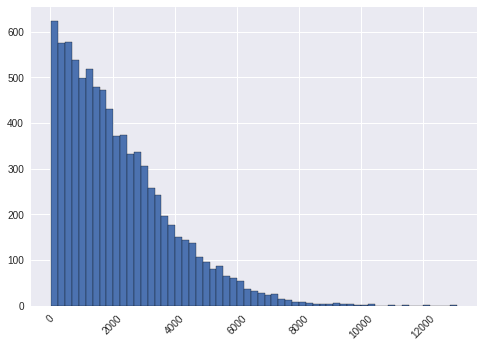

In [23]:
# Using a histogram to to inspect Item outlet sales
print('According to the histogram below we can see that the bulk of the \n item outlet sales were valued below $2,000')
plt.style.use('seaborn');
df['Item_Outlet_Sales'].hist(bins = 'auto',edgecolor='black');
plt.xticks(rotation = 45);

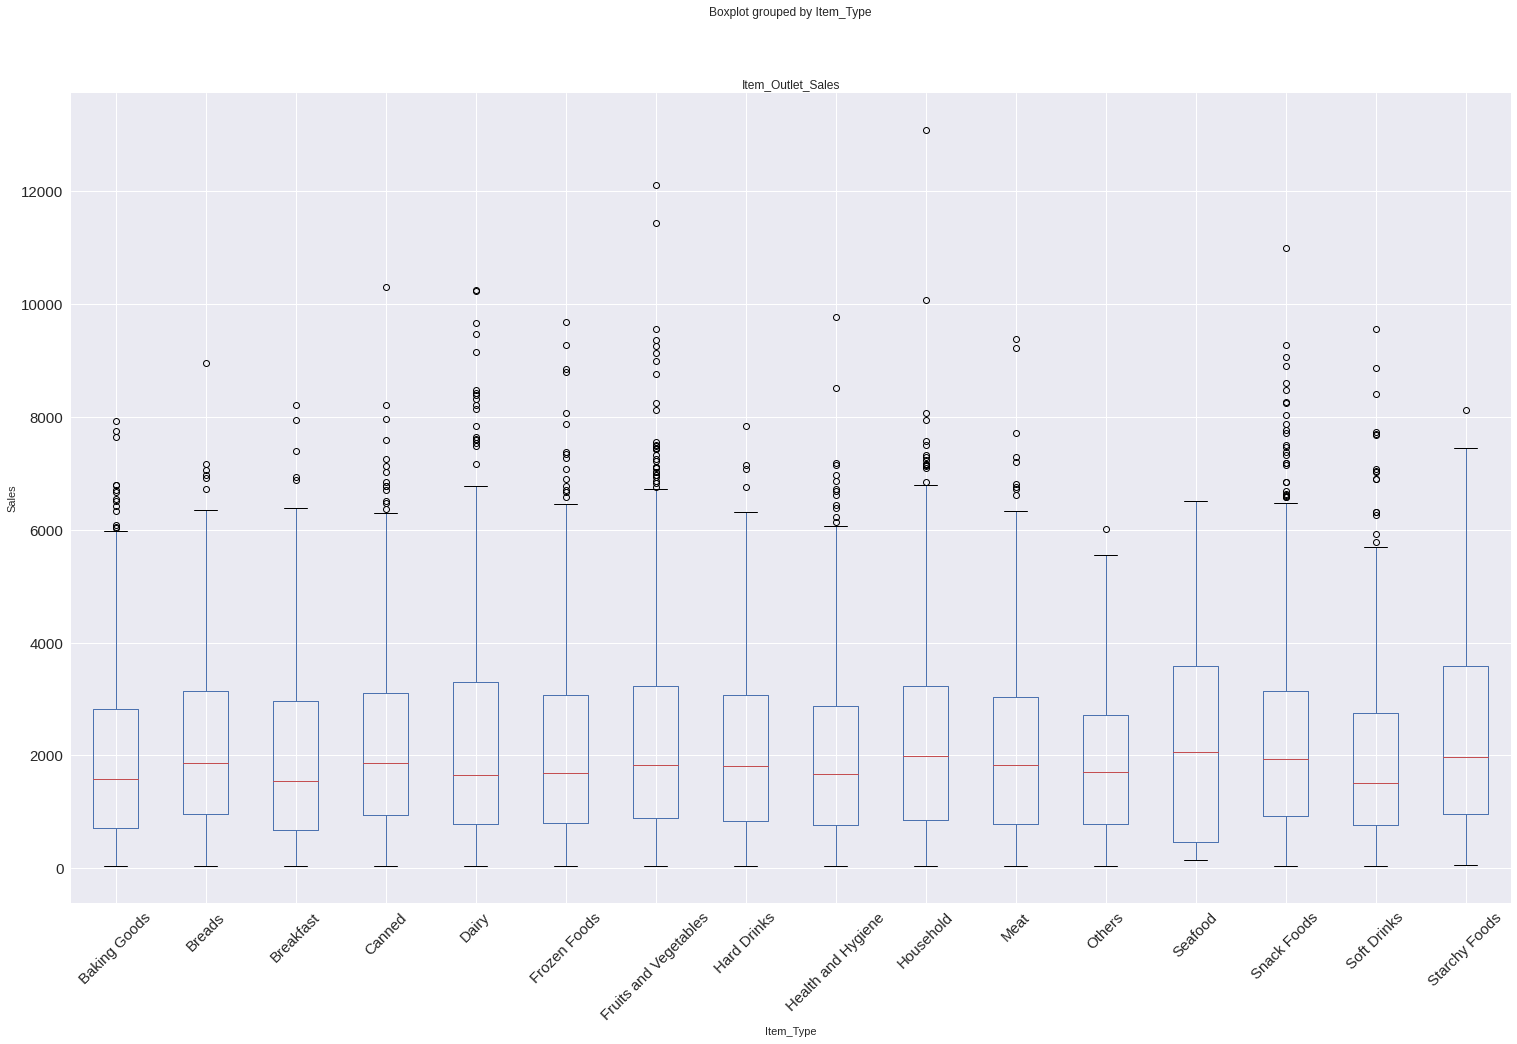

In [24]:
# Boxplot of sales by Item Type

df.boxplot(['Item_Outlet_Sales'], by = 'Item_Type' , figsize = (25,15), fontsize = 15 , rot = 45, grid = True);
plt.ylabel('Sales');
plt.show();

In [25]:
print("We can inspect that the majority of sales are in the item types that tend to be staples and convient such as Dairy, Canned goods, Frozen foods, Fresh produce and Snack foods.")

We can inspect that the majority of sales are in the item types that tend to be staples and convient such as Dairy, Canned goods, Frozen foods, Fresh produce and Snack foods.



We can see there is only a moderate correlation between Item MRP and The Item outlet Sales 
 We can see that Item visibility and item weight have almost no relationship with the other variables in out data set. 


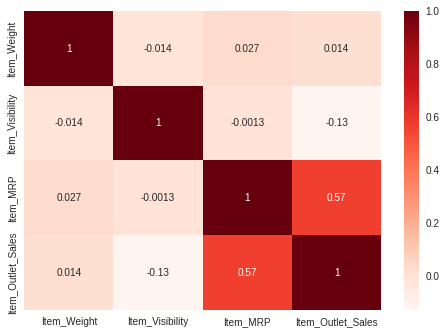

In [26]:
# Correlation Heat map 
corr = df.corr()
sns.heatmap(corr, cmap = 'Reds',annot = True);
print()
print("We can see there is only a moderate correlation between Item MRP and The Item outlet Sales \n We can see that Item visibility and item weight have almost no relationship with the other variables in out data set. ")

## Explanatory Visuals

# Which Outlet type grossed more in sales on average?

In [28]:
average = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
average

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

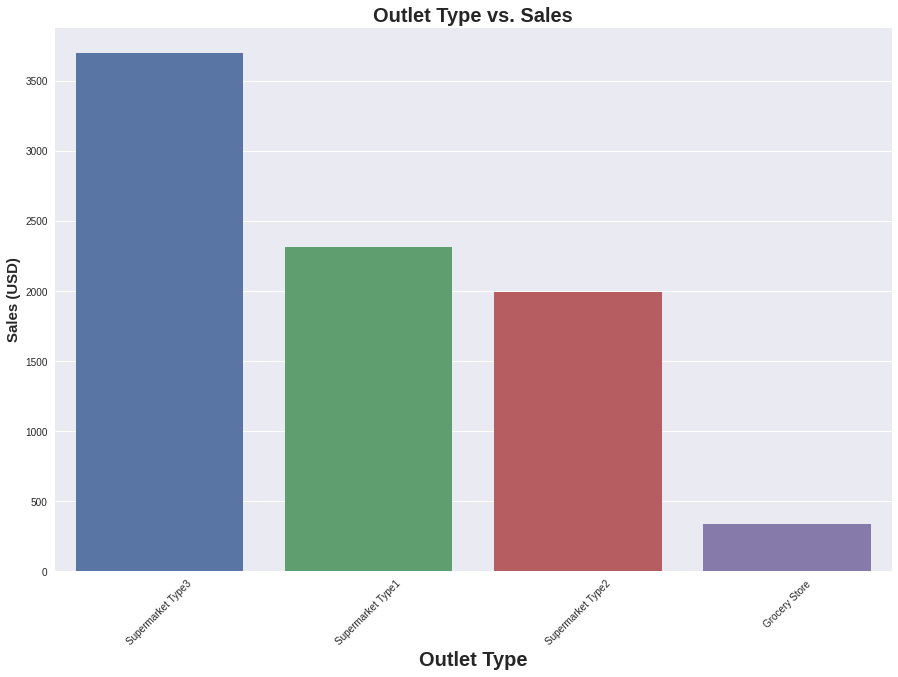

In [32]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.barplot(data=df,x='Outlet_Type', y = 'Item_Outlet_Sales', order = average.index, ci = None)
plt.xticks(rotation = 45)
ax.set_title('Outlet Type vs. Sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet Type', fontsize = 20, fontweight = 'bold')
ax.set_ylabel('Sales (USD)', fontsize = 15, fontweight = 'bold');

We can see that Supermarket Type 3 on average Grossed more sales than all other outlet types.  This is because Supermarket Type 3 is a super center sized market where a typical family will one stop shop for all their needs every week.



# Does Item MRP affect sales?





In [112]:
mrp = df['Item_MRP'].values
sales = df[	'Item_Outlet_Sales'].values


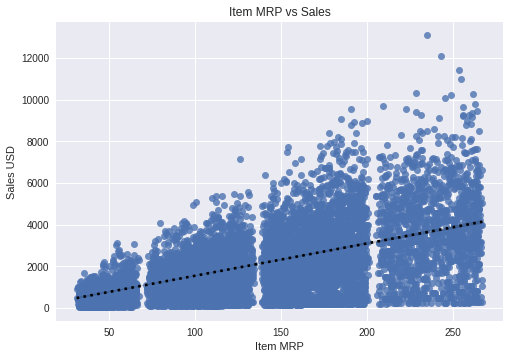

In [118]:
ax = sns.regplot(data = df, x = mrp, y = sales,line_kws = {'color': 'black', 'ls': ':'});
ax.legend(bbox_to_anchor = [1, 1]);
ax.set_title('Item MRP vs Sales')
ax.set_xlabel('Item MRP');
ax.set_ylabel('Sales USD');

We can see that there is a positive relationship between sales and Item MRP.  As additional unit of resource is added to the item, it increases its marginal value thus increasing in sales revenue.

# What are the top 3 and bottom 3 selling categories?

In [126]:
sorted = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)


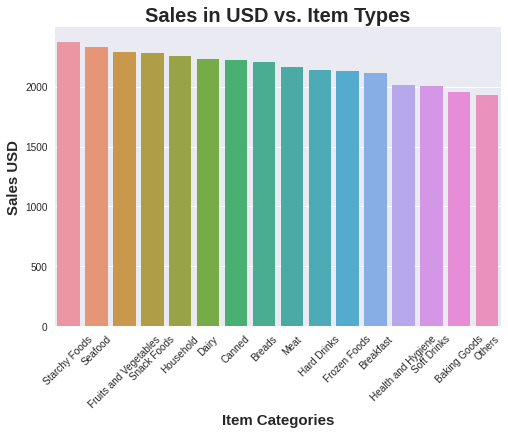

In [125]:


ax = sns.barplot(data=df,x= sorted.index, y = sorted.values)
plt.xticks(rotation = 45)
ax.set_title('Sales in USD vs. Item Types', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Categories', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Sales USD', fontsize = 15, fontweight = 'bold');

# The top 3 selling categories are:

1.   Starchy Foods
2.   Seafood
3.   Fruits and Vegetables



# The lowest 3 selling categories are:

1.   Soft Drinks & Health/Hygiene
2.   Baking Goods
3.   Others

